In [2]:
import pandas as pd
import numpy as np
import json
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# load as Pandas dataframe
df = pd.read_json('logins.json')
df.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
login_time    93142 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [5]:
# Sort the data for ascending time
data_sorted = df.sort_values(by=['login_time'])


In [6]:
# reset the index and drop the old index
data_sorted.reset_index(inplace=True, drop=True)
print(data_sorted.head())

           login_time
0 1970-01-01 20:12:16
1 1970-01-01 20:13:18
2 1970-01-01 20:16:10
3 1970-01-01 20:16:36
4 1970-01-01 20:16:37


In [7]:
# Set the login_time as index to do resampling later and add a column count as 1 to aggregate on something
data_sorted.set_index('login_time', inplace=True)

In [8]:
data_sorted['count'] = 1

In [9]:
# resample for 15 min intervals
data_count = data_sorted.resample('15T').sum()

In [10]:
data_count


,count
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1
...,...
1970-04-13 17:45:00,5
1970-04-13 18:00:00,5
1970-04-13 18:15:00,2


In [11]:
# reset index
data_count.reset_index(inplace=True)

In [12]:
data_count.head()


,login_time,count
0,1970-01-01 20:00:00,2
1,1970-01-01 20:15:00,6
2,1970-01-01 20:30:00,9
3,1970-01-01 20:45:00,7
4,1970-01-01 21:00:00,1


In [13]:
# Add 2 columns showing just the hour and the day
data_count["hour"] = data_count["login_time"].dt.hour
data_count["day"] = data_count["login_time"].dt.day_name()

In [14]:
data_count


,login_time,count,hour,day
0,1970-01-01 20:00:00,2,20,Thursday
1,1970-01-01 20:15:00,6,20,Thursday
2,1970-01-01 20:30:00,9,20,Thursday
3,1970-01-01 20:45:00,7,20,Thursday
4,1970-01-01 21:00:00,1,21,Thursday
...,...,...,...,...
9783,1970-04-13 17:45:00,5,17,Monday
9784,1970-04-13 18:00:00,5,18,Monday
9785,1970-04-13 18:15:00,2,18,Monday
9786,1970-04-13 18:30:00,7,18,Monday


In [15]:
cats = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
data_daily = data_count.groupby(['day'])[['count']].sum().reindex(cats)

In [18]:
# add a column for average in data_daily

data_daily["daily_avg"] = data_count.groupby("day")[['count']].mean()
#extracting hours and days
data_hour = data_count.groupby("hour")[['count']].mean()

In [19]:
data_daily


,count,daily_avg
day,,
Monday,8823,6.213380
Tuesday,9268,6.895833
Wednesday,10339,7.692708
Thursday,11960,8.794118
Friday,15208,10.561111
Saturday,19377,13.456250
Sunday,18167,12.615972


In [20]:
data_hour

,count
hour,
0,14.688725
1,15.482843
2,14.215686
3,11.840686
4,12.338235
5,7.218137
6,2.789216
7,1.997549
8,2.004902


In [23]:
#giving AM/PM labels
day_or_night = lambda row: "AM" if row in range(0,12) else "PM"
data_count["AM-PM"] = data_count["hour"].apply(day_or_night)

#show
display(data_count.head())

,login_time,count,hour,day,AM-PM
0,1970-01-01 20:00:00,2,20,Thursday,PM
1,1970-01-01 20:15:00,6,20,Thursday,PM
2,1970-01-01 20:30:00,9,20,Thursday,PM
3,1970-01-01 20:45:00,7,20,Thursday,PM
4,1970-01-01 21:00:00,1,21,Thursday,PM


In [26]:
# groupby day and day/night and do sum and mean of counts to add the resp columns

data_DN = data_count.groupby(['day','AM-PM'])[['count']].sum()

In [27]:
data_DN['avg'] = data_count.groupby(['day','AM-PM'])[['count']].mean()


In [28]:
data_DN.head()

count        avg
day      AM-PM                  
Friday   AM      5924   8.227778
         PM      9284  12.894444
Monday   AM      3905   5.423611
         PM      4918   7.025714
Saturday AM     10217  14.190278

In [29]:
# groupby hour and then day to get the total counts.

data_hd = data_count.groupby(['hour','day'])[['count']].mean().reset_index()

In [30]:
data_hd

,hour,day,count
0,0,Friday,16.250000
1,0,Monday,8.850000
2,0,Saturday,20.900000
3,0,Sunday,18.716667
4,0,Thursday,14.571429
...,...,...,...
163,23,Saturday,16.766667
164,23,Sunday,9.283333
165,23,Thursday,17.216667
166,23,Tuesday,12.928571


In [31]:
from matplotlib import pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'Average logins on different days of the week')

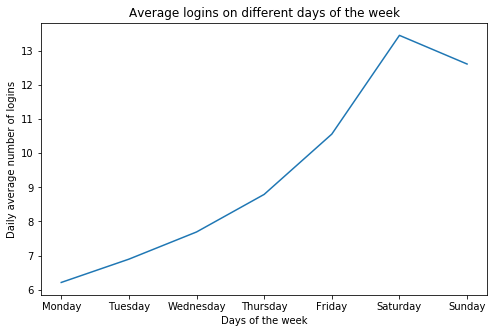

In [33]:
 #Plot the average counts for different days of the week

fig = plt.figure(figsize=(8,5))
plt.plot(data_daily['daily_avg'])
plt.xlabel('Days of the week')
plt.ylabel('Daily average number of logins')
plt.title('Average logins on different days of the week')

Text(0.5, 1.0, 'Total logins on different hours')

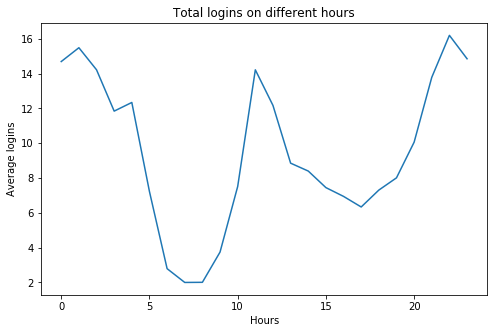

In [34]:
# Plot the average counts during the different hours in a day

fig = plt.figure(figsize=(8,5))
plt.plot(data_hour['count'])
plt.xlabel('Hours')
plt.ylabel('Average logins')
plt.title('Total logins on different hours')

[Text(0.5, 1.0, 'Average Logins per Hour for different days of the week')]

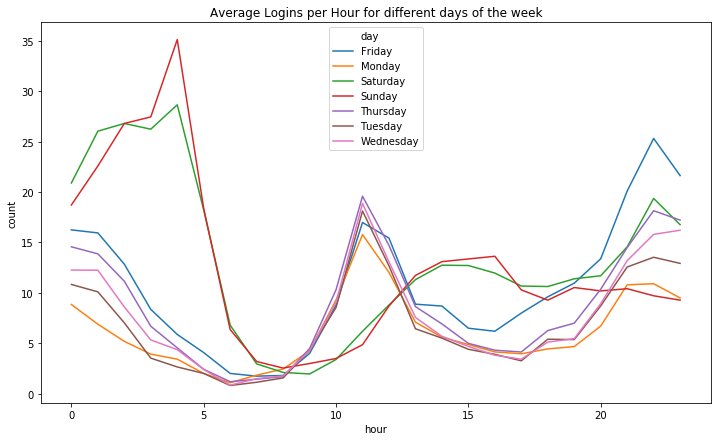

In [35]:
# plot the average counts for each hour for different days

f, axes = plt.subplots(figsize=(12,7))
ax = sns.lineplot(x="hour", y="count", data=data_hd, hue="day")
ax.legend(loc="upper center")
ax.set(title="Average Logins per Hour for different days of the week")

# Part    2    ‑    Experiment    and    metrics    design  

##### The    neighboring     cities    of    Gotham    and    Metropolis    have     complementary     circadian     rhythms:     on  weekdays,    Ultimate    Gotham     is    most     active    at    night,    and    Ultimate    Metropolis     is    most    active  during     the    day.    On    weekends,     there     is     reasonable    activity     in    both     cities.    However,    a     toll    bridge,     with     a     two  ­way     toll,    between     the     two     cities     causes    driver    partners     to     tend  to    be    exclusive     to    each     city.     The     Ultimate    managers    of     city    operations     for     the     two     cities    have  proposed    an    experiment     to     encourage    driver    partners     to    be    available     in    both     cities,    by  reimbursing    all     toll     costs.

1. What    would     you     choose     as     the     key    measure    of     success    of     this    experiment     in  encouraging    driver     partners     to     serve    both     cities,    and    why    would     you     choose     this    metric?

If the drivers were made available in both cities and the toll costs were reimbursed by the company, the key measure of success for this step would be to see an increase in ridership logins to the extent that it more than justifies the cost for tolls. If increase in ridership shows increased profits that justifies toll payments, it has made an impact.

2. Describe    a    practical     experiment     you    would    design     to     compare     the    effectiveness    of     the  proposed     change     in     relation     to     the     key    measure    of     success. 


a) I would allocate half the number of drivers in Metropolis and half the number of drivers in Gotham as permissible to serve both cities while the remaining halves will be restricted to their respective cities. So, now we have a control  population (serving their respective city only) and test population (serving both cities). This way the playing field is even because of the complementary circadian rhythms in the two cities.

b) My null hypothesis for this experiment would be that the proposed change does not bring about any significant change in ridership. Alternative hypothesis would be that the change does significantly increase the ridership. Increase in ridership is considered significant based on the p value. This increase should also be checked further for the company's expense in toll reimbursement.

c)  If the increase in ridership is significant but not enough to justify the cost in toll reimbursements, the business model has not worked even with the rejection of the null hypothesis. The percentage increase in business should be more than all costs. This percentage increase in business should also give an idea if the full conversion of the drivers will make it worthwhile. The proposed change would really be better studied if we could get data on the ridership volume and the time the trip was made between the two cities.


In [36]:
#import data from json file
file = 'ultimate_data_challenge.json'
with open(file) as f:
    data = json.loads(f.read())
df = pd.DataFrame(data)

In [37]:
df.head(10)


,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9
5,Winterfell,2,2014-01-09,3.5,1.00,2014-06-06,iPhone,0.0,True,100.0,10.56,5.0
6,Astapor,1,2014-01-24,NaN,1.00,2014-01-25,Android,0.0,False,100.0,3.95,4.0
7,Winterfell,2,2014-01-28,5.0,1.00,2014-01-29,iPhone,0.0,False,100.0,2.04,5.0
8,Winterfell,2,2014-01-21,4.5,1.00,2014-02-01,Android,0.0,False,100.0,4.36,5.0
9,Winterfell,1,2014-01-03,NaN,1.00,2014-01-05,Android,0.0,False,0.0,2.37,5.0


In [38]:
#inspect dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
city                      50000 non-null object
trips_in_first_30_days    50000 non-null int64
signup_date               50000 non-null object
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
last_trip_date            50000 non-null object
phone                     49604 non-null object
surge_pct                 50000 non-null float64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [39]:
from datetime import datetime as dt
# the dates are strings - need to convert to datetime

df['last_trip_date'][0]

'2014-06-17'

In [40]:
# converting dates to datetime

df['signup_date'] = pd.to_datetime(df['signup_date'])
df['last_trip_date'] = pd.to_datetime(df['last_trip_date'])

In [41]:
# sorted the last_trip_date and got the latest entry ar 2014-07-01 
last_trip_sorted = df['last_trip_date'].sort_values(axis=0).reset_index(drop=True)
last_trip_sorted[49999]

Timestamp('2014-07-01 00:00:00')

In [42]:
# checked if each entry in last_trip_date is between June 1st and June 30th - the values are added to 
# a list, is_retained

d1 = dt(2014,6,1)
d2 = dt(2014,6,30)
is_retained = []
for i in df['last_trip_date']:
    if i > d1 and i < d2:
        is_retained.append(1)
    else:
        is_retained.append(0)

In [43]:
# is_retained is added as a column, user_status to the df

df['user_status'] = is_retained

In [44]:
# total number of active users or retained users 

retained = df['user_status'].sum()

In [45]:
print('Percentage of Users retained is ' + str(retained / len(df['user_status'])*100))


Percentage of Users retained is 32.708


In [46]:
print('No. of null values in avg_rating_of_driver: ' +str(df['avg_rating_of_driver'].isna().sum()))
print('No. of null values in avg_rating_by_driver: ' +str(df['avg_rating_by_driver'].isna().sum()))
print('No. of null values in phone: ' +str(df['phone'].isna().sum()))

No. of null values in avg_rating_of_driver: 8122
No. of null values in avg_rating_by_driver: 201
No. of null values in phone: 396


In [47]:
# fill the NA's with the mean of the respective columns

df = df.fillna(round(df.mean(),1))

In [48]:

# fill the NA's in the 'phone' column with 'Other'

df['phone'] = df['phone'].fillna('Other')

In [49]:
# Now all the NA's are gone.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 13 columns):
city                      50000 non-null object
trips_in_first_30_days    50000 non-null int64
signup_date               50000 non-null datetime64[ns]
avg_rating_of_driver      50000 non-null float64
avg_surge                 50000 non-null float64
last_trip_date            50000 non-null datetime64[ns]
phone                     50000 non-null object
surge_pct                 50000 non-null float64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
avg_dist                  50000 non-null float64
avg_rating_by_driver      50000 non-null float64
user_status               50000 non-null int64
dtypes: bool(1), datetime64[ns](2), float64(6), int64(2), object(2)
memory usage: 4.6+ MB


Text(0.5, 1.0, 'Number of Active/Inactive users')

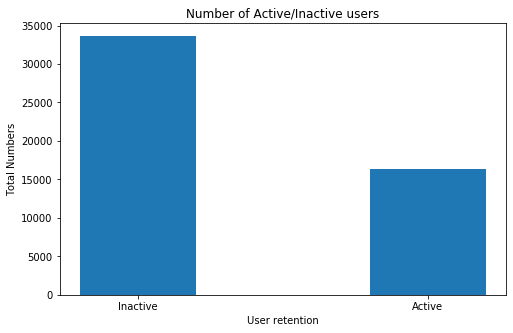

In [50]:
# Plot the user retention numbers

fig = plt.figure(figsize=(8,5))
x = ['Inactive', 'Active']
nos = [(df['user_status'] == 0).sum(), (df['user_status'] == 1).sum()]

plt.bar(x,nos, width=0.4)
plt.xlabel('User retention')
plt.ylabel('Total Numbers')
plt.title('Number of Active/Inactive users')

Text(0.5, 1.0, 'Users with the percentage of weekday use')

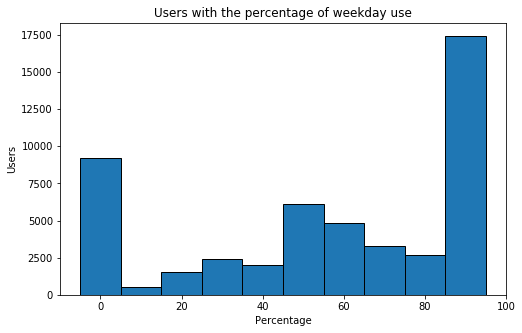

In [51]:
# plot the number of users with different percentages of weekday usage

fig = plt.figure(figsize=(8,5))
plt.hist(df['weekday_pct'], bins=10, align='left', edgecolor='black')
plt.xlabel('Percentage')
plt.ylabel('Users')
plt.title('Users with the percentage of weekday use')

C:\Users\Rsumi\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Total logins on different months')

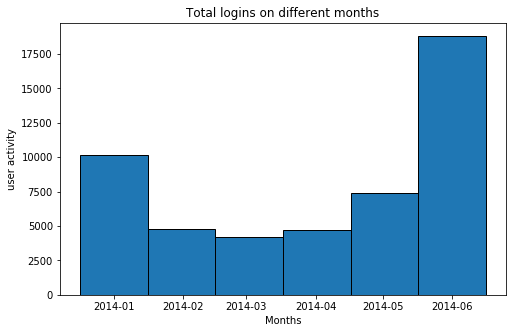

In [52]:
# Plot histogram of number of user activity for each month till June.

fig = plt.figure(figsize=(8,5))
plt.hist(df['last_trip_date'], bins=6, align='left', edgecolor='black')
plt.xlabel('Months')
plt.ylabel('user activity')
plt.title('Total logins on different months')

# Predictive Modelling

In [53]:
from sklearn.preprocessing import  LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import RandomizedSearchCV

In [54]:
# Label encoding the 'city' column

LE = LabelEncoder()
df['city_code'] = LE.fit_transform(df['city'])

In [55]:
print(df['city'].unique())
print(df['city_code'].unique())

["King's Landing" 'Astapor' 'Winterfell']
[1 0 2]


In [56]:
# encoding the 'phone' column

df['phone_code'] = LE.fit_transform(df['phone'])

In [57]:
print(df['phone'].unique())
print(df['phone_code'].unique())

['iPhone' 'Android' 'Other']
[2 0 1]


In [58]:
# Drop the original 'city' and 'phone', and the datetime columns

new_df = df.drop(['city','phone','signup_date', 'last_trip_date'], axis=1)

In [59]:
new_df.head()


,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,user_status,city_code,phone_code
0,4,4.7,1.10,15.4,True,46.2,3.67,5.0,1,1,2
1,0,5.0,1.00,0.0,False,50.0,8.26,5.0,0,0,0
2,3,4.3,1.00,0.0,False,100.0,0.77,5.0,0,0,2
3,9,4.6,1.14,20.0,True,80.0,2.36,4.9,1,1,2
4,14,4.4,1.19,11.8,False,82.4,3.13,4.9,0,2,0


In [60]:

# labels

y = new_df['user_status']

In [61]:
# drop the labels from the new_df and store column names

new_df = new_df.drop(['user_status'],axis=1)
col_names = new_df.columns

In [62]:

# predictor numerical features 

X = new_df

In [63]:
# scaled the features to be between 0 and 1

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [64]:
# Split the scaled data to train and test such that 70% is train and 30% is test data.

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.30, random_state=10)

In [65]:
print('Train features shape:' + str(X_train.shape))
print('Train label shape:' + str(y_train.shape))
print('Test features shape:' + str(X_test.shape))
print('Test features shape:' + str(y_test.shape))

Train features shape:(35000, 10)
Train label shape:(35000,)
Test features shape:(15000, 10)
Test features shape:(15000,)


In [66]:
# Instantiate model - class_weight is set as 'balanced' as we have some imbalance in the dataset.
rf = RandomForestClassifier(class_weight= 'balanced', random_state = 10)
# Train the model on training data
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=10, verbose=0,
                       warm_start=False)

In [67]:
# Use predict method on the test data

predictions = rf.predict(X_test)

In [68]:
# print the classification report
report_baseline = classification_report(y_test, predictions, output_dict=True)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.79      0.83      0.81      9999
           1       0.62      0.56      0.59      5001

    accuracy                           0.74     15000
   macro avg       0.71      0.70      0.70     15000
weighted avg       0.73      0.74      0.74     15000



In [69]:
# To check if the model is overfitting, predict on the train set to see performance

ytrain_predictions = rf.predict(X_train)

In [70]:
# print the classification_report

report_train = classification_report(y_train, ytrain_predictions, output_dict=True)
print(classification_report(y_train, ytrain_predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     23647
           1       1.00      1.00      1.00     11353

    accuracy                           1.00     35000
   macro avg       1.00      1.00      1.00     35000
weighted avg       1.00      1.00      1.00     35000



In [71]:
# Using the RandomizedSearchCV, we chose a few parameters to tune the model.
# create a dictionary of parametric values

random_grid = {'n_estimators': [100,300,500,700,900],
               'max_features': ['sqrt','log2','auto'],
               'bootstrap': [True, False]}

In [72]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune

rf = RandomForestClassifier(class_weight= 'balanced', random_state = 10)

# Random search of parameters, using 3 fold cross validation, 
# search across 20 different combinations
# scoring is set to f1_macro

rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 20, cv = 3, scoring='f1_macro', random_state=10)

# Fit the random search model

rf_random.fit(X_train, y_train)

RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight='balanced',
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
         

In [73]:
# the best parameters

best_parameters = rf_random.best_params_

In [74]:
print(best_parameters)


{'n_estimators': 900, 'max_features': 'auto', 'bootstrap': True}


In [75]:
# Best model with the best parameters

best_model = rf_random.best_estimator_

In [76]:
# Use the best_model to fit the training set

best_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=900,
                       n_jobs=None, oob_score=False, random_state=10, verbose=0,
                       warm_start=False)

In [77]:
# Used the best_model to predict on the test set

ypred_cv = best_model.predict(X_test)

In [78]:
# print the classification report

report_best_model = classification_report(y_test, ypred_cv, output_dict=True)
print(classification_report(y_test, ypred_cv))

              precision    recall  f1-score   support

           0       0.80      0.82      0.81      9999
           1       0.62      0.58      0.60      5001

    accuracy                           0.74     15000
   macro avg       0.71      0.70      0.70     15000
weighted avg       0.74      0.74      0.74     15000



In [79]:
# Collecting the numbers into a list

f1_macro = [report_baseline['macro avg']['f1-score'],report_best_model['macro avg']['f1-score']]
Precision = [report_baseline['macro avg']['precision'],report_best_model['macro avg']['precision']]
Recall = [report_baseline['macro avg']['recall'],report_best_model['macro avg']['recall']]

In [80]:
print('The f1-score macro went from '+ str(round(f1_macro[0],2))+ ' in baseline to '+str(round(f1_macro[1],2))+' in the tuned model')
print('The f1 macro for Precision went from '+ str(round(Precision[0],2))+ ' in baseline to '+str(round(Precision[1],2))+' in the tuned model')
print('The f1 macro for Recall went from '+ str(round(Recall[0],2))+ ' in baseline to '+str(round(Recall[1],2))+' in the tuned model')

The f1-score macro went from 0.7 in baseline to 0.7 in the tuned model
The f1 macro for Precision went from 0.71 in baseline to 0.71 in the tuned model
The f1 macro for Recall went from 0.7 in baseline to 0.7 in the tuned model


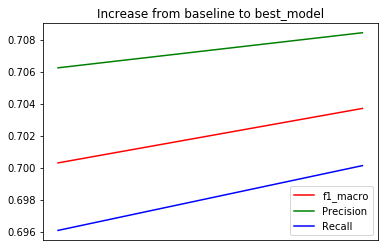

In [81]:
plt.plot(f1_macro, color='red', label='f1_macro')
plt.plot(Precision, color='green', label='Precision')
plt.plot(Recall, color='blue', label='Recall')
plt.title('Increase from baseline to best_model')
plt.xticks([])
plt.legend()

In [82]:
# Print the features and their scores - feature importance

print("Features sorted by their score:")
print(sorted(zip(map(lambda x: round(x, 4), best_model.feature_importances_), col_names), reverse=True))

Features sorted by their score:
[(0.3174, 'avg_dist'), (0.1339, 'weekday_pct'), (0.1012, 'avg_rating_by_driver'), (0.0871, 'trips_in_first_30_days'), (0.0861, 'avg_rating_of_driver'), (0.0729, 'surge_pct'), (0.0708, 'city_code'), (0.0601, 'avg_surge'), (0.0429, 'phone_code'), (0.0275, 'ultimate_black_user')]
